In [1]:
import numpy as np
import pandas as pd
import os

dir_path = os.path.abspath('')
FILE = dir_path + '/../CSV/' + 'misurazione_distanza_variabile.csv'

ERRORE_SENSIBILITA_OSCILLOSCOPIO = 1 #

fr = pd.read_csv(FILE, sep = ';')  # fileread

l = np.array(fr['L']) # m
f1 = np.array(fr['f1']) # prima onda stazionaria
f2 = np.array(fr['f2']) # seconda onda stazionaria (più precisa)

### verifica $\nu \propto \frac{1}{L}$

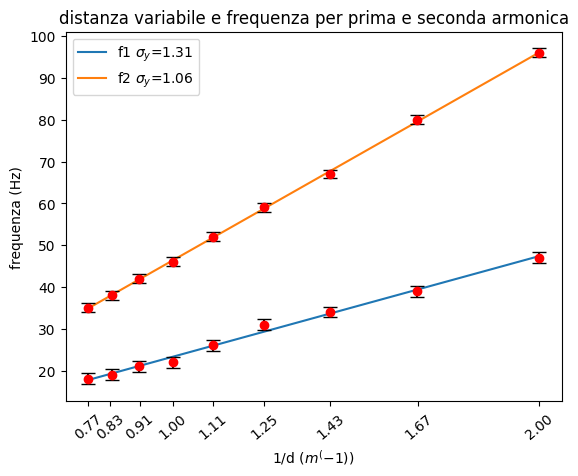

In [3]:
import matplotlib.pyplot as plt
from interpolazione3 import RettaInterpolata

x = 1/l

r1 = RettaInterpolata(x,f1, ERRORE_SENSIBILITA_OSCILLOSCOPIO)
plt.plot(r1.x_best,r1.y_best, label=f"f1 $\sigma_y$={round(r1.sigmaY,2)}")
plt.errorbar(x,f1, yerr=r1.sigmaY, fmt='o', ecolor='black', color="red", capsize=5)

r2 = RettaInterpolata(x,f2, ERRORE_SENSIBILITA_OSCILLOSCOPIO)
plt.plot(r2.x_best,r2.y_best,label=f"f2 $\sigma_y$={round(r2.sigmaY,2)}")
plt.errorbar(x,f2, yerr=r2.sigmaY, fmt='o', ecolor='black', color="red", capsize=5)

plt.title("distanza variabile e frequenza per prima e seconda armonica")
plt.xlabel('1/d ($m^(-1)$)')
plt.ylabel('frequenza (Hz)')
plt.xticks(np.round(x,2),rotation=40)
plt.legend()
plt.show()